<a href="https://colab.research.google.com/github/bforoura/IDS/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Example 3.5: Regression**

* The ﬁrst variable, **attitude**, represents the amount of positive
attitude of the students who have taken an examination
* The **score** represents the marks scored by the participants in the examination.


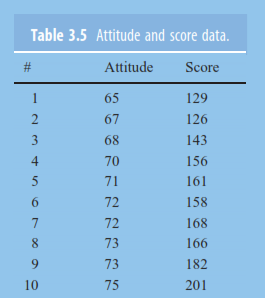

In [80]:
# import some of the needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [98]:
# Let's create a dataframe for the data

studentsDF = pd.DataFrame({
      'Attitude': [65, 67, 68, 70, 71, 72, 72, 73, 73, 75],
      'Score':    [129, 126, 143, 156, 161, 158, 168, 166, 182, 201],
})

"""
An alternative: 
   data = [ [65, 129], [67, 126], [68, 143],
            [70, 156], [71, 161], [72, 158],
            [72, 168], [73, 166], [73, 182], 
            [75,201]]

  studentsDF = pd.DataFrame(data, columns = ['Attitude', 'Score'])
"""

studentsDF
 

,Attitude,Score
0,65,129
1,67,126
2,68,143
3,70,156
4,71,161
5,72,158
6,72,168
7,73,166
8,73,182
9,75,201


In [99]:
# Let's convert to a numpy array

studentsDF.to_numpy() 



array([[ 65, 129],
       [ 67, 126],
       [ 68, 143],
       [ 70, 156],
       [ 71, 161],
       [ 72, 158],
       [ 72, 168],
       [ 73, 166],
       [ 73, 182],
       [ 75, 201]])

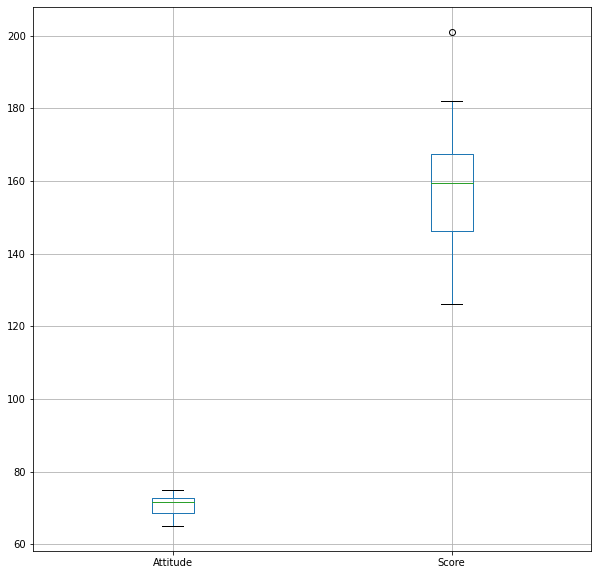

In [82]:
# Examine the variable spreads around the means

studentsDF.boxplot(figsize=(10,10))



In [83]:
# Examine the covraiance matrix

studentsDF.cov()



,Attitude,Score
Attitude,9.600000,66.555556
Score,66.555556,520.222222




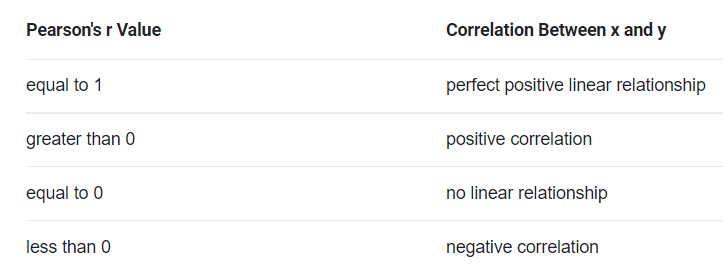


In [84]:
# Examine the correlation matrix

studentsDF.corr()



,Attitude,Score
Attitude,1.00000,0.94179
Score,0.94179,1.00000


In [85]:
# Let's verify the above results with our own code

def corr_matrix(s1, s2): 
  return np.cov(s1, s2)/(np.std(s1) * np.std(s2))

print(corr_matrix(studentsDF['Attitude'], studentsDF['Score']))





[[0.15093802 1.04643375]
 [1.04643375 8.17930351]]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2542d4350>,
      dtype=object)

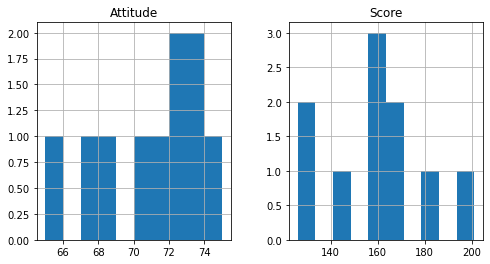

In [86]:
# the histogram

studentsDF.hist(figsize=(8, 4))


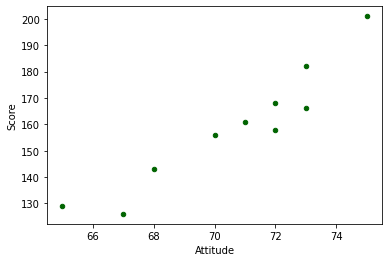

In [87]:
# Let's draw the scatter plot

studentsDF.plot.scatter(x='Attitude', y='Score', color="DarkGreen")



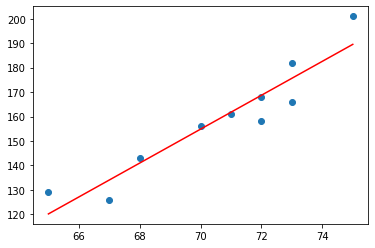

In [90]:
# Perform regression to find the best line to goes through these points

from sklearn.linear_model import LinearRegression

# Save the first column (all the rows) in X
X = studentsDF.iloc[:, 0].values.reshape(-1,1)

# Save the second column (all the rows) in Y
Y = studentsDF.iloc[:, 1].values.reshape(-1,1)

# Create the model
LRmodel = LinearRegression()  

# Perform linear regression
LRmodel.fit(X, Y)   

# Make predictions
Y_pred = LRmodel.predict(X)  


# Visualize the dataset and the regression line:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.show()



In [78]:
# The equation of the line is:

print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)



The slope:  [[6.93287037]]
The intercept:  [-330.46064815]


In [79]:
# Error analysis


from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))



MSE:  52.921064814814805
R2:  0.8869691054788236


### **MinMax Scaling**





In [101]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

minmax_scaled = scaler.fit_transform(studentsDF)


studentsDF_minmax_scaled = pd.DataFrame(minmax_scaled, 
    columns=['Attitude', 'Score'])


studentsDF_minmax_scaled



,Attitude,Score
0,0.0,0.040000
1,0.2,0.000000
2,0.3,0.226667
3,0.5,0.400000
4,0.6,0.466667
5,0.7,0.426667
6,0.7,0.560000
7,0.8,0.533333
8,0.8,0.746667
9,1.0,1.000000


In [103]:
# Let's examine the correlatrion matrix again

studentsDF_minmax_scaled.corr()



,Attitude,Score
Attitude,1.00000,0.94179
Score,0.94179,1.00000


### **StandardScaling**



In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standard_scaled = scaler.fit_transform(studentsDF)


studentsDF_standard_scaled = pd.DataFrame(standard_scaled, 
    columns=['Attitude', 'Score'])


studentsDF_standard_scaled

,Attitude,Score
0,-1.905159,-1.386454
1,-1.224745,-1.525100
2,-0.884538,-0.739442
3,-0.204124,-0.138645
4,0.136083,0.092430
5,0.476290,-0.046215
6,0.476290,0.415936
7,0.816497,0.323506
8,0.816497,1.062948
9,1.496910,1.941036


In [116]:
# Standard scaler shifts the means to or near to zero

m1 = studentsDF_standard_scaled['Attitude'].mean()
m2 = studentsDF_standard_scaled['Score'].mean()

print("The new shifted means: %6.6f and %6.6f" % (m1, m2))



The new shifted means: 0.000000 and 0.000000


In [117]:
# Let's examine the correlatrion matrix again

studentsDF_standard_scaled.corr()




,Attitude,Score
Attitude,1.00000,0.94179
Score,0.94179,1.00000
